In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/organic_carbon.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              3276 non-null   float64
 1   Hardness        3276 non-null   float64
 2   Solids          3276 non-null   float64
 3   Conductivity    3276 non-null   float64
 4   Turbidity       3276 non-null   float64
 5   Organic_carbon  3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


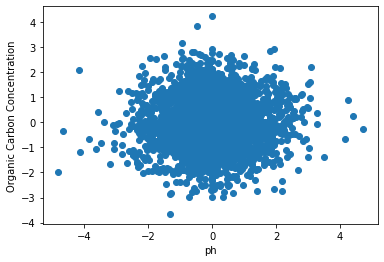

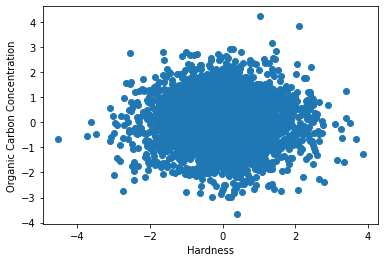

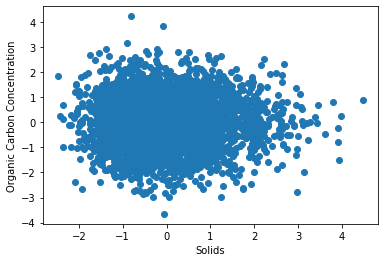

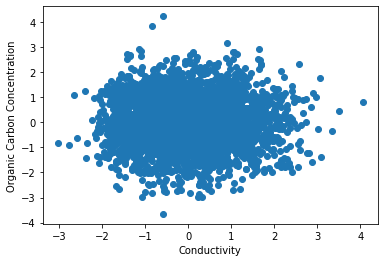

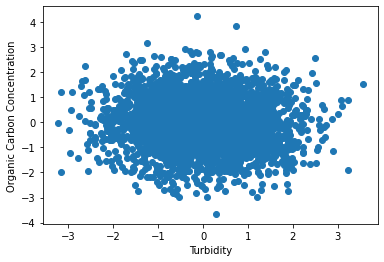

In [5]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Organic_carbon"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Organic Carbon Concentration")
    plt.show()

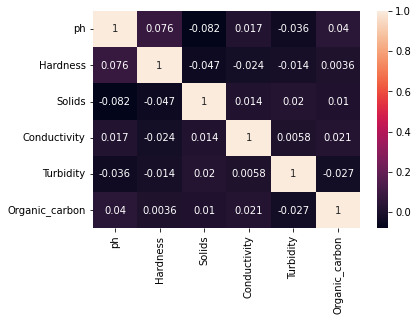

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
from pycaret.regression import *
regression = setup(df, target='Organic_carbon', fold=3)
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,8179
1,Target,Organic_carbon
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.8003,1.0088,1.0039,-0.0041,0.6059,1.0474,0.6367
en,Elastic Net,0.8003,1.0088,1.0039,-0.0041,0.6059,1.0474,0.1567
dummy,Dummy Regressor,0.8003,1.0088,1.0039,-0.0041,0.6059,1.0474,0.3000
llar,Lasso Least Angle Regression,0.8003,1.0088,1.0039,-0.0041,0.6059,1.0474,0.1500
br,Bayesian Ridge,0.8003,1.0095,1.0043,-0.0049,0.5946,1.2011,0.1533
ridge,Ridge Regression,0.8009,1.0108,1.0049,-0.0060,0.5760,1.4121,0.5833
lr,Linear Regression,0.8009,1.0108,1.0049,-0.0061,0.5759,1.4124,1.0300
lar,Least Angle Regression,0.8009,1.0108,1.0049,-0.0061,0.5759,1.4124,0.1667
omp,Orthogonal Matching Pursuit,0.8012,1.0109,1.0050,-0.0062,0.5838,1.3666,0.1500
huber,Huber Regressor,0.8020,1.0133,1.0062,-0.0086,0.5649,1.5358,0.1600


                                    Model     MAE     MSE    RMSE      R2  \
lasso                    Lasso Regression  0.8003  1.0088  1.0039 -0.0041   
en                            Elastic Net  0.8003  1.0088  1.0039 -0.0041   
dummy                     Dummy Regressor  0.8003  1.0088  1.0039 -0.0041   
llar         Lasso Least Angle Regression  0.8003  1.0088  1.0039 -0.0041   
br                         Bayesian Ridge  0.8003  1.0095  1.0043 -0.0049   
ridge                    Ridge Regression  0.8009  1.0108  1.0049 -0.0060   
lr                      Linear Regression  0.8009  1.0108  1.0049 -0.0061   
lar                Least Angle Regression  0.8009  1.0108  1.0049 -0.0061   
omp           Orthogonal Matching Pursuit  0.8012  1.0109  1.0050 -0.0062   
huber                     Huber Regressor  0.8020  1.0133  1.0062 -0.0086   
ada                    AdaBoost Regressor  0.8061  1.0202  1.0098 -0.0161   
gbr           Gradient Boosting Regressor  0.8254  1.0665  1.0324 -0.0624   

In [10]:
import pickle 
pickle.dump(best_model, open("Models/Organic_Carbon_Regressor.pkl", "wb"))